In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

In [4]:
x_train.shape[1:]

(28, 28)

In [5]:
x_train=tf.pad(x_train,[[0,0],[2,2],[2,2]])/255
x_test=tf.pad(x_test,[[0,0],[2,2],[2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [6]:
x_train=tf.expand_dims(x_train,axis=3,name=None)
x_test=tf.expand_dims(x_test,axis=3,name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [7]:
#Last 2000 for validation 
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [8]:
# Define the LeNet-5 model
model = models.Sequential()

# Input Layer (32x32x1)
model.add(layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32, 32, 1)))
print("After Conv1: ", model.output_shape)  # (None, 28, 28, 6)

model.add(layers.AveragePooling2D(pool_size=2, strides=2))
print("After Pool1: ", model.output_shape)  # (None, 14, 14, 6)

model.add(layers.Conv2D(16, kernel_size=5, activation='tanh'))
print("After Conv2: ", model.output_shape)  # (None, 10, 10, 16)

model.add(layers.AveragePooling2D(pool_size=2, strides=2))
print("After Pool2: ", model.output_shape)  # (None, 5, 5, 16)

model.add(layers.Conv2D(120, kernel_size=5, activation='tanh'))
print("After Conv3: ", model.output_shape)  # (None, 1, 1, 120)+

model.add(layers.Flatten())
print("After Flatten: ", model.output_shape)  # (None, 120)

model.add(layers.Dense(84, activation='tanh'))
print("After Dense1: ", model.output_shape)  # (None, 84)

model.add(layers.Dense(10, activation='softmax'))
print("After Output: ", model.output_shape)  # (None, 10)

# Print full model summary
model.summary()


After Conv1:  (None, 28, 28, 6)
After Pool1:  (None, 14, 14, 6)
After Conv2:  (None, 10, 10, 16)
After Pool2:  (None, 5, 5, 16)
After Conv3:  (None, 1, 1, 120)
After Flatten:  (None, 120)
After Dense1:  (None, 84)
After Output:  (None, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8487 - loss: 0.4995 - val_accuracy: 0.9800 - val_loss: 0.0889
Epoch 2/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9642 - loss: 0.1148 - val_accuracy: 0.9840 - val_loss: 0.0641
Epoch 3/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9783 - loss: 0.0709 - val_accuracy: 0.9855 - val_loss: 0.0568
Epoch 4/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9842 - loss: 0.0524 - val_accuracy: 0.9855 - val_loss: 0.0555
Epoch 5/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9878 - loss: 0.0404 - val_accuracy: 0.9870 - val_loss: 0.0435
Epoch 6/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9880 - val_loss: 0.0489
Epoch 7/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.9895 - val_loss: 0.0509
Epoch 8/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9922 - loss: 0.0226 - 

In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9853 - loss: 0.0607
Test Accuracy: 98.71%


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random test image
index = np.random.randint(0, len(x_test))
test_image = x_test[index]  # Shape: (32, 32, 1)

# Expand dimensions to match model input shape (batch_size=1)
test_image = np.expand_dims(test_image, axis=0)

# Get model prediction
predictions = model.predict(test_image)  # Shape: (1, 10)
predicted_label = np.argmax(predictions)  # Get class with highest probability

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {np.max(predictions) * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Label: 3
Confidence: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


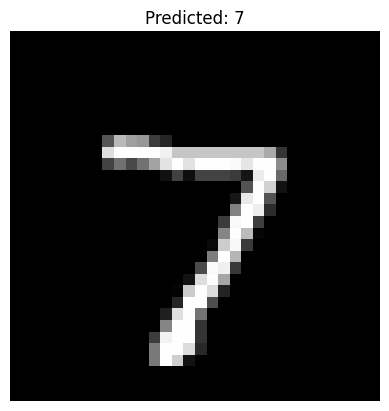

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Select an image from the test set
index = 0  # Choose any index from test set
image = x_test[index].numpy().squeeze()  # Convert tensor to NumPy and remove dimensions

# Make a prediction
prediction = model.predict(np.expand_dims(x_test[index], axis=0))  # Add batch dimension
predicted_label = np.argmax(prediction)

# Show the image with the predicted label
plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
